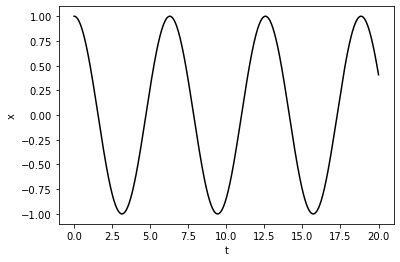

In [1]:
# Activity 8

import numpy as np
import matplotlib.pyplot as plt

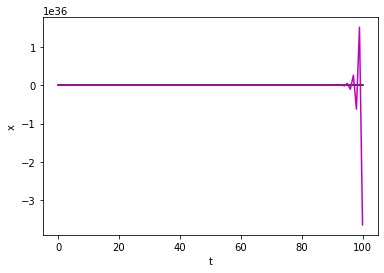

In [72]:
# Define the IVP
a = 1
T = 100
dt = 1

g = lambda t: -(1 + a ** 2 / 4) * np.exp(-a * t / 2) * np.sin(t)
f = lambda t, x: -a * x + g(t)
x_true = lambda t: np.exp(-a * t / 2) * (np.cos(t) - (a / 2) * np.sin(t))

# Plot the true solution
tplot = np.linspace(0, T, 1000)
plt.figure()
plt.plot(tplot, x_true(tplot), 'k')
plt.xlabel('t')
plt.ylabel('x')


# Solve the IVP with forward Euler
def forward_euler(f, T, dt):
    t = np.arange(0, T + dt, dt)
    n = t.size
    x = np.zeros(n)
    x[0] = 1
    for k in range(n - 1):
        x[k+1] = x[k] + dt * f(t[k], x[k])
    return t, x


# Uncomment these when you're done with question 1
# t, x = forward_euler(f, T, dt)
# plt.plot(t, x, 'b')

# Solve the IVP with backward Euler
def backward_euler(a, g, T, dt):
    t = np.arange(0, T + dt, dt)
    n = t.size
    x = np.zeros(n)
    x[0] = 1
    for k in range(n - 1):
        x[k+1] = (x[k] + dt * g(t[k+1])) / (1+dt*a)
    return t, x


# Uncomment these when you're done with question 2
# t, x = backward_euler(a, g, T, dt)
# plt.plot(t, x, 'r')


# Solve the IVP with the trapezoidal method
def trapezoidal(f, a, g, T, dt):
    t = np.arange(0, T + dt, dt)
    n = t.size
    x = np.zeros(n)
    x[0] = 1
    for k in range(n - 1):
        forwards = x[k] + dt * f(t[k], x[k])
        backwards = (x[k] + dt * g(t[k+1])) / (1+dt*a)
        x[k+1] = (forwards + backwards) / 2
    return t, x


# Uncomment these when you're done with question 3
# t, x = trapezoidal(f, a, g, T, dt)
# plt.plot(t, x, 'g')


# Solve the IVP with the leapfrog method
def leapfrog(f, T, dt, x1):
    t = np.arange(0, T + dt, dt)
    n = t.size
    x = np.zeros(n)
    x[0] = 1
    x[1] = x1
    for k in range(1, n - 1):
        x[k+1] = x[k-1] + 2 * dt * f(t[k], x[k])
    return t, x


# Calculate x1 using the true solution
x1 = x_true(dt)
# Uncomment these when you're done with question 6
t, x = leapfrog(f, T, dt, x1)
plt.plot(t, x, 'm')

plt.show()